In the terminal window:
(General usage)
mongoimport --db dbname --collection collectionname --file input-file.json
(for this project:)
mongoimport --db open_street_map --collection berkeley --file berkeley.osm.json

In [1]:
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def get_db(db_name):
    from pymongo import MongoClient
    client = MongoClient('localhost:27017')
    db = client[db_name]
    return db

In [4]:
db = get_db('open_street_map')

In [5]:
"""
Drop collection if need to re-populate it with cleaned data
"""
#db.drop_collection('berkeley') 

In [7]:
db.berkeley.count()

231784

In [8]:
"""
Count number of node and way elements
"""

query = [{"$group": 
                  {"_id": "$type", 
                   "count":{"$sum":1}}},
         {"$sort": {"count": -1}}
        ]
result = [c for c in db.berkeley.aggregate(query)]
pprint.pprint(result)

[{u'_id': u'node', u'count': 201050}, {u'_id': u'way', u'count': 30734}]


Some keys in the key value pairs have the same key as the fields that were given special meaning, such as 'type'.  Make sure to avoid using these reserved words.

Number of elements contributed per user and 
Number of unique users (created.uid and created.user

In [9]:
query = [{"$group": {
            "_id": "unique_users_id",
            "unique_users_set": {"$addToSet":"$created.user"} 
        }
         },
         {"$limit": 1}
        ]
result =[c['unique_users_set'] for c in db.berkeley.aggregate(query)]  
len(result[0])

548

In [10]:
query=[{"$group":{
            "_id":{"uid":"$created.uid","user":"$created.user"},
            "count":{"$sum": 1}
        }},
       {"$sort": {"count":-1}},
       {"$limit":5}
      ]
result = [c for c in db.berkeley.aggregate(query)]
result

[{u'_id': {u'uid': u'1249504', u'user': u'EranChazan'}, u'count': 35663},
 {u'_id': {u'uid': u'933797', u'user': u'oba510'}, u'count': 30197},
 {u'_id': {u'uid': u'381909', u'user': u'JessAk71'}, u'count': 21669},
 {u'_id': {u'uid': u'941449', u'user': u'lyzidiamond'}, u'count': 21489},
 {u'_id': {u'uid': u'153669', u'user': u'dchiles'}, u'count': 20120}]

In [11]:
"""
Just exploring BART stations and their toilets.
"""

query = {"operator": {"$regex": "BART|Bay Area Rapid Transit"}}
project = {"_id":0, "operator": 1, "name":1, 
           "toilets":1, "toilets_collection":1,
           "wheelchair":1
          }
cursor = db.berkeley.find(query,project)
result = [c for c in cursor]
result

[{u'name': u'MacArthur',
  u'operator': u'Bay Area Rapid Transit (BART)',
  u'toilets': u'yes',
  u'toilets_collection': {u'wheelchair': u'yes'},
  u'wheelchair': u'yes'},
 {u'name': u'Rockridge',
  u'operator': u'Bay Area Rapid Transit (BART)',
  u'toilets': u'yes',
  u'toilets_collection': {u'wheelchair': u'yes'},
  u'wheelchair': u'yes'},
 {u'name': u'Ashby',
  u'operator': u'Bay Area Rapid Transit (BART)',
  u'toilets': u'private',
  u'toilets_collection': {u'wheelchair': u'private'},
  u'wheelchair': u'yes'},
 {u'name': u'Oakland City Center - 12th Street',
  u'operator': u'Bay Area Rapid Transit (BART)',
  u'toilets': u'private',
  u'toilets_collection': {u'wheelchair': u'private'},
  u'wheelchair': u'yes'},
 {u'name': u'19th St Oakland',
  u'operator': u'Bay Area Rapid Transit (BART)',
  u'toilets': u'private',
  u'toilets_collection': {u'wheelchair': u'private'},
  u'wheelchair': u'yes'},
 {u'name': u'West Oakland', u'operator': u'Bay Area Rapid Transit (BART)'},
 {u'name': u'D

In [12]:
"""
Exploring operator field
"""

query = [{"$group": {"_id": "$operator",
                     "count": {"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit": 6}
]

cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
result

[{u'_id': None, u'count': 231251},
 {u'_id': u'AC Transit', u'count': 239},
 {u'_id': u'City CarShare', u'count': 51},
 {u'_id': u'USPS', u'count': 31},
 {u'_id': u'University of California, Berkeley (Cal)', u'count': 20},
 {u'_id': u'California College of the Arts', u'count': 19}]

In [13]:
"""
Exploring amenity field
"""
query = [{"$group": {"_id": "$amenity",
                     "count": {"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit": 6}
]

cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
pprint.pprint(result)

[{u'_id': None, u'count': 227980},
 {u'_id': u'parking', u'count': 984},
 {u'_id': u'restaurant', u'count': 594},
 {u'_id': u'place_of_worship', u'count': 241},
 {u'_id': u'cafe', u'count': 237},
 {u'_id': u'bicycle_parking', u'count': 172}]


What are the number of lanes for each highway type?
What is the average number of lanes for each highway type?

In [14]:
"""
Number of lanes for each type of highway
"""

query = [{"$match": {"type": "way"}},
    {"$group": {"_id": {"highway":"$highway"},
                "avg_lanes_per_highway": {"$avg":"$lanes"}}},
    {"$sort": {"avg_lanes_per_highway":-1}}
]

cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
pprint.pprint(result)

[{u'_id': {u'highway': u'abandoned'}, u'avg_lanes_per_highway': 5.0},
 {u'_id': {u'highway': u'motorway'},
  u'avg_lanes_per_highway': 3.6754966887417218},
 {u'_id': {u'highway': u'secondary'},
  u'avg_lanes_per_highway': 3.177159590043924},
 {u'_id': {u'highway': u'cycleway'}, u'avg_lanes_per_highway': 3.0},
 {u'_id': {u'highway': u'primary'},
  u'avg_lanes_per_highway': 2.777456647398844},
 {u'_id': {u'highway': u'tertiary'},
  u'avg_lanes_per_highway': 2.2057142857142855},
 {u'_id': {u'highway': u'unclassified'},
  u'avg_lanes_per_highway': 1.8148148148148149},
 {u'_id': {u'highway': u'motorway_link'},
  u'avg_lanes_per_highway': 1.7331378299120235},
 {u'_id': {u'highway': u'residential'},
  u'avg_lanes_per_highway': 1.4328358208955223},
 {u'_id': {u'highway': u'secondary_link'}, u'avg_lanes_per_highway': 1.375},
 {u'_id': {u'highway': u'primary_link'},
  u'avg_lanes_per_highway': 1.3333333333333333},
 {u'_id': {u'highway': u'service'},
  u'avg_lanes_per_highway': 1.0833333333333333

In [15]:
"""
Average lanes per way
"""
query = [
    {"$match": {"type": "way"}},
    {"$group": {"_id": "all highways",
                "avg_lanes": {"$avg":"$lanes"}}
    },
    {"$limit": 5}
        
]
cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
pprint.pprint(result)

[{u'_id': u'all highways', u'avg_lanes': 2.6786060019361084}]


How many nodes are associated with each way? (most nodes, least nodes)

In [16]:
#most node references per way
query=[{"$match": {"type":"way"}},
       {"$unwind": "$node_refs"},
       {"$group": {"_id": {"id":"$id"},
                   "node_count": {"$sum": 1}}},
       {"$sort": {"node_count": -1}},
       {"$limit": 5}
      ]
cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
result

[{u'_id': {u'id': u'192565555'}, u'node_count': 711},
 {u'_id': {u'id': u'123075097'}, u'node_count': 438},
 {u'_id': {u'id': u'114224294'}, u'node_count': 370},
 {u'_id': {u'id': u'11564185'}, u'node_count': 352},
 {u'_id': {u'id': u'33088737'}, u'node_count': 290}]

I can search in the open street map site by way, for example:
http://www.openstreetmap.org/way/192565555

This shows that the way with 711 nodes is a path that surrounds the Redwood Regional Park and Anthony Chabot Regional Park.

In [17]:
#way with id 192565555 has 711 node references
query = {"id":"192565555"}
node_l = []
for c in db.berkeley.find(query)[0:1]:
    node_l = c['node_refs']

In [18]:
node_set = set(node_l)
len(node_set)

711

In [19]:
#find the nodes that are part of this way
query={
        "id": {"$in": node_l}
       }
node_elements_l = []
for c in db.berkeley.find(query):
    node_elements_l.append(c)

Of the 711 nodes referenced by this way, 25 are found in this map data.

In [20]:
node_full_l = [n['id'] for n in node_elements_l]
pprint.pprint(node_full_l) 

[u'1294145185',
 u'1294145770',
 u'1294147487',
 u'1294148307',
 u'1294151515',
 u'1294152041',
 u'1294152922',
 u'1294158905',
 u'1294159458',
 u'1294162671',
 u'1294165693',
 u'1294165934',
 u'1294168201',
 u'1294172050',
 u'1294172266',
 u'1294172476',
 u'1294174536',
 u'1294176560',
 u'1294177150',
 u'1294177608',
 u'1294179275',
 u'1294180450',
 u'1294181773',
 u'1294182149',
 u'1294182598']


In [21]:
len(node_elements_l)

25

In [22]:
#get the node references that are not found as node tags
set(node_l) - set(node_full_l)

{u'1294143478',
 u'1294143513',
 u'1294143661',
 u'1294143807',
 u'1294143908',
 u'1294144001',
 u'1294144032',
 u'1294144044',
 u'1294144125',
 u'1294144134',
 u'1294144217',
 u'1294144255',
 u'1294144304',
 u'1294144351',
 u'1294144373',
 u'1294144499',
 u'1294144510',
 u'1294144592',
 u'1294144628',
 u'1294144768',
 u'1294144773',
 u'1294144854',
 u'1294144866',
 u'1294144894',
 u'1294144935',
 u'1294144952',
 u'1294145041',
 u'1294145084',
 u'1294145130',
 u'1294145134',
 u'1294145162',
 u'1294145257',
 u'1294145337',
 u'1294145420',
 u'1294145454',
 u'1294145468',
 u'1294145543',
 u'1294145552',
 u'1294145640',
 u'1294145810',
 u'1294145844',
 u'1294145930',
 u'1294146012',
 u'1294146043',
 u'1294146056',
 u'1294146127',
 u'1294146163',
 u'1294146249',
 u'1294146328',
 u'1294146359',
 u'1294146413',
 u'1294146444',
 u'1294146456',
 u'1294146535',
 u'1294146620',
 u'1294146656',
 u'1294146700',
 u'1294146727',
 u'1294146784',
 u'1294146851',
 u'1294146862',
 u'1294146942',
 u'12941

In [23]:
"""
the node not found in the node_full_l is in the open street map
1294143478
http://www.openstreetmap.org/node/1294143478

It just wasn't part of the region that was exported to the .osm file.
"""
for c in db.berkeley.find({"id":"1294143478"}):
    pprint.pprint(c) #nothing returned

I can find the nodes by querying the open street map page by node id number:
For example:
http://www.openstreetmap.org/node/1294181773

1294145185: near CA-13 highway, Alameda County farm import

In [24]:
#least number of node references per way
query=[{"$match": {"type":"way"}},
       {"$unwind": "$node_refs"},
       {"$group": {"_id": {"id":"$id"},
                   "node_count": {"$sum": 1}}},
       {"$sort": {"node_count": 1}},
       {"$limit": 5}
      ]
cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
result

[{u'_id': {u'id': u'376265067'}, u'node_count': 1},
 {u'_id': {u'id': u'416784160'}, u'node_count': 1},
 {u'_id': {u'id': u'438682980'}, u'node_count': 1},
 {u'_id': {u'id': u'438683950'}, u'node_count': 2},
 {u'_id': {u'id': u'438682992'}, u'node_count': 2}]

In [25]:
"""
average number of node references per way
for ways that have at least one node reference
"""
query=[{"$match": {"type":"way"}},
       {"$unwind": "$node_refs"},
       {"$group": {"_id": "$id",
                   "node_count": {"$sum": 1}}},
       {"$group": {"_id": "average nodes per way",
                   "avg": {"$avg": "$node_count"}
        }
       },
       #{"$sort": {"node_count": 1}},
       {"$limit": 5}
      ]
cursor = db.berkeley.aggregate(query)
result = [c for c in cursor]
result

[{u'_id': u'average nodes per way', u'avg': 8.082612090844016}]

plot of number of node references

In [26]:
#least number of node references per way
query=[{"$match": {"type":"way"}},
       {"$unwind": "$node_refs"},
       {"$group": {"_id": {"id":"$id"},
                   "node_count": {"$sum": 1}}},
       {"$sort": {"node_count": 1}},
       {"$project": {"_id":0,"node_count":1}}
      ]
cursor = db.berkeley.aggregate(query)
result = [c['node_count'] for c in cursor]
node_count_arr = np.array(result)

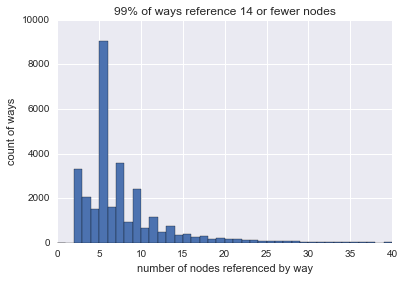

In [27]:
plt.hist(node_count_arr,bins=40,range=(0,40));
plt.title('99% of ways reference 14 or fewer nodes');
plt.xlabel("number of nodes referenced by way");
plt.ylabel("count of ways");

In [28]:
(q25,q50,q75,q90,q99) = np.percentile(node_count_arr,[25,50,75,90,99])
print "25% {} 50% {} 75% {} 99% {}".format(q25,q50,q75,q90,q99)

25% 5.0 50% 5.0 75% 9.0 99% 14.0


How many ways are associated with each node on average?

In [29]:
"""
We're starting with one way referencing many nodes in a list.
The desired format is one node referencing multiple ways, 
and then counting how many ways per node.

Also, we want to make sure that the starting list of node 
references is unique.

First, unwind the node_refs list, then re-add them to a set
'unique_nodes'.  Then we can unwind the set so that
each document has one way and one node.

Then we can group by node and count the number of ways,
as well as add the id of each way to a set.
"""

query = [
    {"$match": {"type": "way"}},
    {"$unwind": "$node_refs"},
    {"$group": {"_id":{"way_id": "$id"},
                "unique_nodes": {"$addToSet": "$node_refs"}
               }},
    {"$unwind": "$unique_nodes"},
    {"$group": {"_id": {"node_id":"$unique_nodes"},
                "way_count": {"$sum": 1},
                "way_set": {"$addToSet": "$_id.way_id"}
               }},
    {"$sort": {"way_count": -1}}
    #,{"$limit":3}
]
node_l = [c['way_count'] for c in db.berkeley.aggregate(query)]

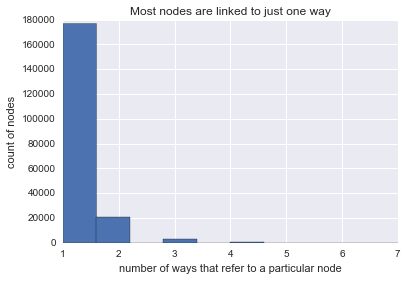

In [30]:
plt.hist(node_l);
plt.title("Most nodes are linked to just one way");
plt.xlabel("number of ways that refer to a particular node");
plt.ylabel("count of nodes");

One node: 53035669 has 7 ways.
http://www.openstreetmap.org/node/53035669

When searching the map, we see that it is the intersection of 6 streets and a neighbordhood border: Park Boulevard (two-way), Park Boulevard (two one-way lanes), Excelsior Avenue, Alma Place, Grosvenor Place, and also a neighborhood border (Glenview).

Average number of ways per node?

In [31]:
query = [
    {"$match": {"type": "way"}},
    {"$unwind": "$node_refs"},
    {"$group": {"_id":{"way_id": "$id"},
                "unique_nodes": {"$addToSet": "$node_refs"}
               }},
    {"$unwind": "$unique_nodes"},
    {"$group": {"_id": {"node_id":"$unique_nodes"},
                "way_count": {"$sum": 1},
               }},
    {"$group": {"_id":"avg_way_count_per_node",
                "avg_way_count": {"$avg": "$way_count"}
               }},
    {"$limit":3}
    ]
node_l = [c for c in db.berkeley.aggregate(query)]
node_l

[{u'_id': u'avg_way_count_per_node', u'avg_way_count': 1.1447853309926048}]